Kolumny w movies_df:
Index(['Unnamed: 0', 'budget', 'homepage', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'status', 'tagline', 'title', 'vote_average', 'vote_count',
       'genre_id'],
      dtype='object')
                                         title           genres
0                                       Avatar  Brak informacji
1     Pirates of the Caribbean: At World's End  Brak informacji
2                                      Spectre  Brak informacji
3                        The Dark Knight Rises  Brak informacji
4                                  John Carter  Brak informacji
...                                        ...              ...
4798                               El Mariachi  Brak informacji
4799                                 Newlyweds  Brak informacji
4800                 Signed, Sealed, Delivered  Brak informacji
4801                          Shanghai Calling  Brak informacji
4802   

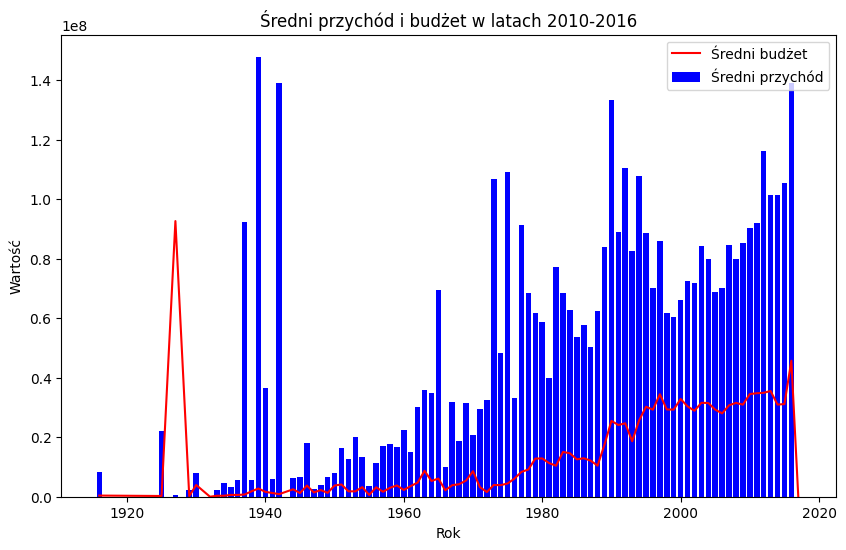

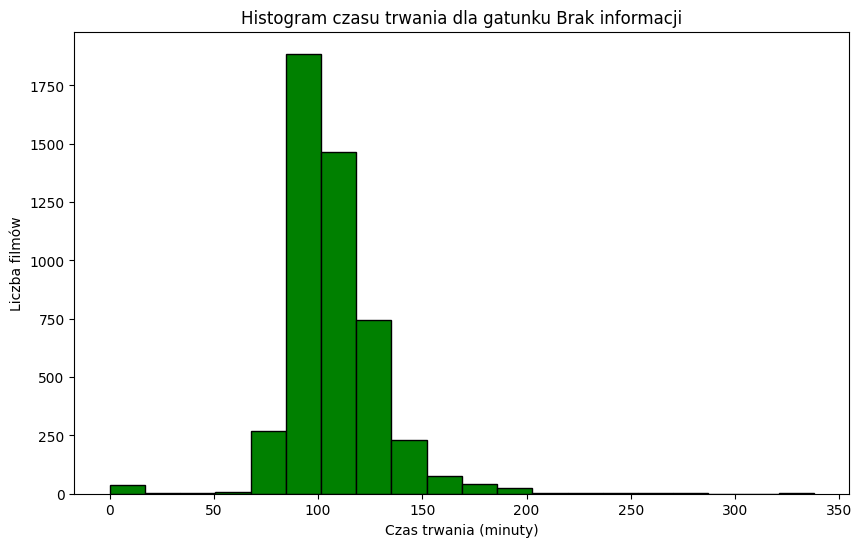

2. Najczęściej pojawiający się gatunek: Brak informacji, liczba filmów: 4803
3. Gatunek z najdłuższym czasem trwania: Brak informacji


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych
movies_df = pd.read_csv('tmdb_movies.csv')
genres_df = pd.read_csv('tmdb_genres.csv')

# Wyświetlenie dostępnych kolumn w movies_df
print("Kolumny w movies_df:")
print(movies_df.columns)

# Połączenie kolumny 'genre_id' z 'id' w genres_df
movies_df['genre_id'] = movies_df['genre_id'].astype(str)  # Konwersja genre_id na str
merged_df = movies_df.merge(genres_df, left_on='genre_id', right_on='genres', how='left')

# Wypełnienie brakujących wartości w kolumnie 'genres'
merged_df['genres'].fillna('Brak informacji', inplace=True)

# Wyświetlenie wyników
print(merged_df[['title', 'genres']])

# Sprawdzenie dostępnych kolumn w movies_df
print("Kolumny w movies_df:")
print(movies_df.columns)

# 1. 10 najwyżej ocenianych filmów z liczbą głosów > 3. kwartyla
q3 = merged_df['vote_count'].quantile(0.75)
top_rated_movies = merged_df[merged_df['vote_count'] > q3].nlargest(10, 'vote_average')

# Poprawienie konwersji kolumny release_date na typ daty
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'])
grouped_data = merged_df.groupby(merged_df['release_date'].dt.year)[['revenue', 'budget']].mean()

plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['revenue'], label='Średni przychód', color='blue')
plt.plot(grouped_data.index, grouped_data['budget'], label='Średni budżet', color='red')
plt.xlabel('Rok')
plt.ylabel('Wartość')
plt.title('Średni przychód i budżet w latach 2010-2016')
plt.legend(loc='upper right')
plt.show()

# 3. Najczęściej pojawiający się gatunek
most_common_genre = merged_df['genres'].value_counts().idxmax()
num_movies_of_genre = merged_df[merged_df['genres'] == most_common_genre].shape[0]

# 5. Gatunek z najdłuższym czasem trwania
avg_runtime_by_genre = merged_df.groupby('genres')['runtime'].mean()
longest_runtime_genre = avg_runtime_by_genre.idxmax()

# 6. Histogram czasu trwania dla najdłuższego gatunku
plt.figure(figsize=(10, 6))
plt.hist(merged_df[merged_df['genres'] == longest_runtime_genre]['runtime'], bins=20, color='green', edgecolor='black')
plt.xlabel('Czas trwania (minuty)')
plt.ylabel('Liczba filmów')
plt.title(f'Histogram czasu trwania dla gatunku {longest_runtime_genre}')
plt.show()

# Wyświetlenie wyników
print(f'2. Najczęściej pojawiający się gatunek: {most_common_genre}, liczba filmów: {num_movies_of_genre}')
print(f'3. Gatunek z najdłuższym czasem trwania: {longest_runtime_genre}')